<a href="https://colab.research.google.com/github/schoLigth/HTML/blob/master/PP_Model_LSTM_CNN_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. PREPROCESSING

# 1. Load Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
# Baca dataset agroclimtologi, pemisah kolom ';' dan ',' untuk desimal
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SKRIPSI/Agroclimatologi Bogor_all.csv', sep=';', decimal=',')
df1.head()

,YEAR,DOY,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,...,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN
0,1982,1,17.15,88.44,8.16,96.84,0.81,1.27,0.09,1.18,...,-999.0,-999.0,24.13,21.98,23.06,24.52,5.02,27.05,22.04,-999.0
1,1982,2,17.46,93.0,4.58,96.73,1.72,2.99,0.57,2.42,...,-999.0,-999.0,23.48,22.26,22.87,23.6,3.86,25.83,21.97,-999.0
2,1982,3,16.72,87.06,4.25,96.76,1.48,2.74,0.38,2.36,...,-999.0,-999.0,24.01,21.57,22.79,24.55,6.89,27.83,20.94,-999.0
3,1982,4,17.03,88.81,8.58,96.81,1.85,3.99,0.18,3.81,...,-999.0,-999.0,23.92,21.88,22.9,24.13,5.19,26.79,21.61,-999.0
4,1982,5,17.09,92.31,9.62,96.79,1.71,3.13,0.82,2.31,...,-999.0,-999.0,23.25,21.89,22.57,23.52,5.66,26.4,20.74,-999.0


In [43]:
# Baca dataset, pemisah kolom ';' dan ',' untuk desimal
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SKRIPSI/Padi Jawa Barat 2018 - 2022.csv', sep=';', decimal=',')
df2.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bulan,luas_panen,satuan,produksi_padi,satuan.1,produktivitas_padi,satuan.2,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,JANUARI,4270,HEKTAR,25475,TON GABAH KERING GILING,59.66,KUINTAL PER HEKTAR,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,FEBRUARI,4246,HEKTAR,25290,TON GABAH KERING GILING,59.56,KUINTAL PER HEKTAR,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,MARET,7525,HEKTAR,44928,TON GABAH KERING GILING,59.70,KUINTAL PER HEKTAR,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,APRIL,6616,HEKTAR,39470,TON GABAH KERING GILING,59.65,KUINTAL PER HEKTAR,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,MEI,6574,HEKTAR,36418,TON GABAH KERING GILING,55.40,KUINTAL PER HEKTAR,2018


# 2. Sinkronisasi data
Pastikan kedua dataset memiliki format waktu yang seragam.
Anda mungkin perlu menyesuaikan format tanggal atau mengonversi format waktu menjadi format yang sama.

In [44]:
# Resampling dataset agroclimatology
# ubah DOY menjadi datetime dengan asumsi itu adalah hari dalam setahun
df1['tanggal'] = pd.to_datetime(df1['YEAR'].astype(str) + df1['DOY'].astype(str), format='%Y%j')

# set 'tanggal' sebagai index
df1.set_index('tanggal', inplace=True)

In [45]:
# # Membuat kolom 'bulan' berdasarkan index
# df1['bulan'] = df1.index % 12 + 1  # +1 karena bulan dimulai dari 1, bukan 0

# df1

In [46]:
# Ubah tipe data kolom ke float
for col in df1.columns:
    df1[col] = df1[col].astype(float)

In [47]:
# resampling data harian menjadi bulanan dengan mengambil rata"
df1 = df1.resample('M').mean()

In [48]:
df1

,YEAR,DOY,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,...,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN
tanggal,,,,,,,,,,,,,,,,,,,,,
1982-01-31,1982.0,16.0,16.802258,90.230645,12.136452,96.831613,2.288065,4.073871,0.944516,3.128065,...,-999.000000,-999.000000,23.410645,21.644194,22.526774,23.622903,5.223871,26.411290,21.188065,-999.000000
1982-02-28,1982.0,45.5,16.793571,89.212500,5.942143,96.809643,1.885357,3.352857,0.862143,2.492143,...,-999.000000,-999.000000,23.619286,21.621071,22.619286,23.855000,6.474643,27.168571,20.692500,-999.000000
1982-03-31,1982.0,75.0,16.579677,86.985484,2.829355,96.824839,1.460968,2.618387,0.633548,1.984516,...,-999.000000,-999.000000,23.897419,21.420645,22.659032,24.279032,7.200000,27.941290,20.740645,-999.000000
1982-04-30,1982.0,105.5,17.412333,86.635667,4.081333,96.816667,1.298667,2.271000,0.552667,1.717667,...,-999.000000,-999.000000,24.769000,22.221333,23.495000,25.142333,6.742667,28.641667,21.897667,-999.000000
1982-05-31,1982.0,136.0,16.850323,84.344516,3.074194,96.823548,1.112903,2.133548,0.495161,1.638065,...,-999.000000,-999.000000,24.693548,21.639032,23.166452,25.025484,7.886774,29.014516,21.128065,-999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,2023.0,228.0,15.838710,80.255484,0.567097,96.981613,1.163871,2.269355,0.392581,1.875161,...,0.457097,2.529355,24.694516,20.669032,22.681613,25.067742,10.030323,30.039677,20.010645,406.166452
2023-09-30,2023.0,258.5,15.330000,75.395667,0.157333,96.920000,1.268667,2.447333,0.310667,2.138333,...,0.509000,2.856000,25.356333,20.131667,22.743333,26.128000,11.377667,31.426333,20.046667,404.466000
2023-10-31,2023.0,289.0,16.441935,73.165484,1.447419,96.970000,1.220968,2.464194,0.256774,2.208065,...,0.507742,2.863871,27.103226,21.264839,24.183871,28.164194,10.163871,32.772903,22.610000,418.500968


In [49]:
# # Resampling dataset produktivitas
# # ubah DOY menjadi datetime dengan asumsi itu adalah hari dalam setahun
# df2['tanggal'] = pd.to_datetime(df2['tahun'].astype(str) + df2['bulan'].astype(str), format='%Y%j')

# # set 'tanggal' sebagai index
# df2.set_index('tanggal', inplace=True)

In [50]:
# mengambil data khsusus kota Bogor dari dataset produktivitas
df2 = df2[df2['nama_kabupaten_kota'] == 'KABUPATEN BOGOR']

In [51]:
# change name of 'bulan' to number of month
bulan2 = {'JANUARI':1, 'FEBRUARI':2, 'MARET':3, 'APRIL':4, 'MEI':5, 'JUNI':6, 'JULI':7, 'AGUSTUS':8, 'SEPTEMBER':9, 'OKTOBER':10, 'NOVEMBER':11, 'DESEMBER':12}
df2['bulan'] = df2['bulan'].map(bulan2)

In [52]:
# drop column yang tidak digunakan dari kedua dataset

# drop1 = ['nama_kabupaten_kota', 'kode_provinsi', 'kode_kabupaten_kota']
# data = df2.drop(drop1, axis=1)

drop2 = ['id',	'kode_provinsi',	'nama_provinsi',	'kode_kabupaten_kota',	'nama_kabupaten_kota',	'satuan',	'satuan.1',	'satuan.2']
df2 = df2.drop(drop2, axis=1)

In [53]:
# Ubah tipe data kolom ke float
for col in df2.columns:
    df2[col] = df2[col].astype(float)

In [54]:
# Mengubah kolom 'tahun' menjadi 'YEAR'
df2 = df2.rename(columns={'tahun': 'YEAR'})

# 3. Penyesuaian Rentang Waktu
Anda memiliki data agroclimatology dari tahun 1982 sampai 2023, sedangkan data produktivitas padi hanya dari tahun 2018 sampai 2022. Anda perlu memutuskan rentang waktu mana yang ingin Anda fokuskan. Anda bisa memotong data agroclimatology untuk mencocokkan rentang waktu data produktivitas padi.

In [55]:
# Penyelarasan rentang waktu pada data agroclimatology 2018-2022
df1 = df1[(df1['YEAR'] >= 2018) & (df1['YEAR'] <= 2022)]

In [56]:
df1

,YEAR,DOY,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,...,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN
tanggal,,,,,,,,,,,,,,,,,,,,,
2018-01-31,2018.0,16.0,17.315484,88.888710,6.597419,96.648710,2.451935,4.242258,1.130323,3.111935,...,0.379677,1.973871,24.155806,22.092258,23.123871,24.269677,5.709355,27.421290,21.710000,410.891935
2018-02-28,2018.0,45.5,17.418214,89.712143,15.147143,96.843214,1.708214,3.263929,0.661786,2.600357,...,0.420000,2.221786,24.110357,22.223929,23.168214,24.254643,5.779643,27.337857,21.558214,413.462500
2018-03-31,2018.0,75.0,17.535484,87.231613,10.213548,96.777419,1.467097,2.544194,0.728710,1.816129,...,0.441613,2.347419,24.728387,22.319032,23.523548,24.949032,6.650968,28.471935,21.820645,410.414516
2018-04-30,2018.0,105.5,18.051667,87.188667,7.158667,96.779000,1.318000,2.440000,0.565667,1.874333,...,0.392000,2.043333,25.215333,22.798333,24.007667,25.348000,6.297667,28.773000,22.474000,416.254667
2018-05-31,2018.0,136.0,17.576129,85.636452,2.637097,96.823871,1.338710,2.365806,0.584839,1.780000,...,0.362903,1.894194,25.127742,22.348387,23.738065,25.275484,7.378065,29.160968,21.784516,413.428065
2018-06-30,2018.0,166.5,17.106667,84.772000,2.327667,96.908667,1.124333,1.986000,0.442667,1.542333,...,0.331667,1.742667,24.864667,21.924667,23.395333,25.036000,7.143000,28.864000,21.720000,412.297667
2018-07-31,2018.0,197.0,15.053548,79.457097,0.131613,96.870645,1.028387,2.126774,0.316452,1.809032,...,0.370968,1.943548,23.940645,19.816452,21.878065,24.052581,9.744839,29.117742,19.373871,399.200968
2018-08-31,2018.0,228.0,15.091290,78.761935,0.867742,96.913548,1.097419,2.250323,0.303548,1.946452,...,0.385806,2.023226,24.195806,19.865806,22.030323,24.710968,10.166452,29.635484,19.469355,405.762903
2018-09-30,2018.0,258.5,15.487333,77.037000,2.475667,96.933333,1.256000,2.359000,0.363333,1.995000,...,0.412667,2.164333,25.120333,20.319667,22.719667,25.854000,10.075000,30.547667,20.472000,410.458667


# 4. Penyesuaian Jumlah Fitur
Dataset agroclimatology memiliki 38 fitur, sedangkan dataset produktivitas padi hanya memiliki 5 fitur. Anda perlu memutuskan fitur mana yang ingin Anda gunakan dalam model Anda. Anda bisa memilih subset fitur yang paling relevan atau melakukan teknik ekstraksi fitur untuk mengekstrak fitur yang paling penting.

In [57]:
df2

,bulan,luas_panen,produksi_padi,produktivitas_padi,YEAR
0,1.0,4270.0,25475.0,59.66,2018.0
1,2.0,4246.0,25290.0,59.56,2018.0
2,3.0,7525.0,44928.0,59.70,2018.0
3,4.0,6616.0,39470.0,59.65,2018.0
4,5.0,6574.0,36418.0,55.40,2018.0
5,6.0,4336.0,24022.0,55.41,2018.0
6,7.0,7533.0,41728.0,55.40,2018.0
7,8.0,5527.0,30630.0,55.41,2018.0
8,9.0,4328.0,23307.0,53.86,2018.0
9,10.0,3619.0,19488.0,53.85,2018.0


# 5. Normalisasi Data
Normalisasi data penting untuk memastikan bahwa semua fitur memiliki skala yang seragam. LSTM-CNN akan berkinerja lebih baik jika data dinormalisasi ke rentang yang seragam, misalnya antara 0 dan 1.

Normalisasi data menggunakan min-max scalling

In [58]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Min-Max Scaling
# scaler = MinMaxScaler()
# # Normalisasi df1
# df1[df1.columns] = scaler.fit_transform(df1[df1.columns])

# df1.info()

In [59]:
# # Normalisasi df2

# # Min-Max Scaling
# scaler = MinMaxScaler()
# df2[df2.columns] = scaler.fit_transform(df2[df2.columns])

# df2.info()

# 6. Penggabungan Data
Gabungkan data agroclimatology dan produktivitas padi menjadi satu dataset yang lengkap. Pastikan untuk menyinkronkan data sehingga setiap entri dalam dataset cocok dengan waktu yang sesuai.

In [67]:
# Menggabungkan dataset agroclimatology dan dataset produktivitas
df = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)

# df.info()

In [68]:
df

,YEAR,DOY,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,...,TS,T2M_RANGE,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN,bulan,luas_panen,produksi_padi,produktivitas_padi,YEAR
0,2018.0,16.0,17.315484,88.888710,6.597419,96.648710,2.451935,4.242258,1.130323,3.111935,...,24.269677,5.709355,27.421290,21.710000,410.891935,1.0,4270.0,25475.0,59.66,2018.0
1,2018.0,45.5,17.418214,89.712143,15.147143,96.843214,1.708214,3.263929,0.661786,2.600357,...,24.254643,5.779643,27.337857,21.558214,413.462500,2.0,4246.0,25290.0,59.56,2018.0
2,2018.0,75.0,17.535484,87.231613,10.213548,96.777419,1.467097,2.544194,0.728710,1.816129,...,24.949032,6.650968,28.471935,21.820645,410.414516,3.0,7525.0,44928.0,59.70,2018.0
3,2018.0,105.5,18.051667,87.188667,7.158667,96.779000,1.318000,2.440000,0.565667,1.874333,...,25.348000,6.297667,28.773000,22.474000,416.254667,4.0,6616.0,39470.0,59.65,2018.0
4,2018.0,136.0,17.576129,85.636452,2.637097,96.823871,1.338710,2.365806,0.584839,1.780000,...,25.275484,7.378065,29.160968,21.784516,413.428065,5.0,6574.0,36418.0,55.40,2018.0
5,2018.0,166.5,17.106667,84.772000,2.327667,96.908667,1.124333,1.986000,0.442667,1.542333,...,25.036000,7.143000,28.864000,21.720000,412.297667,6.0,4336.0,24022.0,55.41,2018.0
6,2018.0,197.0,15.053548,79.457097,0.131613,96.870645,1.028387,2.126774,0.316452,1.809032,...,24.052581,9.744839,29.117742,19.373871,399.200968,7.0,7533.0,41728.0,55.40,2018.0
7,2018.0,228.0,15.091290,78.761935,0.867742,96.913548,1.097419,2.250323,0.303548,1.946452,...,24.710968,10.166452,29.635484,19.469355,405.762903,8.0,5527.0,30630.0,55.41,2018.0
8,2018.0,258.5,15.487333,77.037000,2.475667,96.933333,1.256000,2.359000,0.363333,1.995000,...,25.854000,10.075000,30.547667,20.472000,410.458667,9.0,4328.0,23307.0,53.86,2018.0
9,2018.0,289.0,16.601935,77.157097,4.637742,96.901290,1.224516,2.304516,0.306774,1.998387,...,27.214194,9.001613,31.300000,22.298710,418.120000,10.0,3619.0,19488.0,53.85,2018.0


In [ ]:
# HAPUS DUPLIKAT KOLOM 'YEAR'
# Dapatkan indeks dari kolom 'YEAR' kedua
index = df.columns.to_list().index('YEAR', df.columns.to_list().index('YEAR')+1)

# Buat salinan dari daftar nama kolom
new_columns = df.columns.to_list()

# Ubah nama kolom 'YEAR' kedua
new_columns[index] = 'YEAR_2'

# Terapkan nama kolom baru ke DataFrame
df.columns = new_columns

In [76]:
# drop column 'YEAR' berada pada kolom terakhir
df = df.drop(columns=['YEAR_2'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 60 non-null     float64
 1   DOY                  60 non-null     float64
 2   QV2M                 60 non-null     float64
 3   RH2M                 60 non-null     float64
 4   PRECTOTCORR          60 non-null     float64
 5   PS                   60 non-null     float64
 6   WS2M                 60 non-null     float64
 7   WS2M_MAX             60 non-null     float64
 8   WS2M_MIN             60 non-null     float64
 9   WS2M_RANGE           60 non-null     float64
 10  WD2M                 60 non-null     float64
 11  WS10M                60 non-null     float64
 12  WS10M_MAX            60 non-null     float64
 13  WS10M_MIN            60 non-null     float64
 14  WS10M_RANGE          60 non-null     float64
 15  WD10M                60 non-null     float

In [105]:
# Menyimmpan dataset hasil preprocessing ke dalam Drive

from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/gdrive')

# Simpan DataFrame sebagai file CSV
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/SKRIPSI/produktivitas padi berdasarkan agroclimatology.csv', index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# II. EKSPLORATORY DATA ANALYSIS (EDA):

# Bagaimana produktivitas padi perbulan?

In [63]:
# Kelompokkan data berdasarkan bulan dan hitung total produktivitas per bulan
grouped = df.groupby('bulan')['produktivitas_padi'].sum()

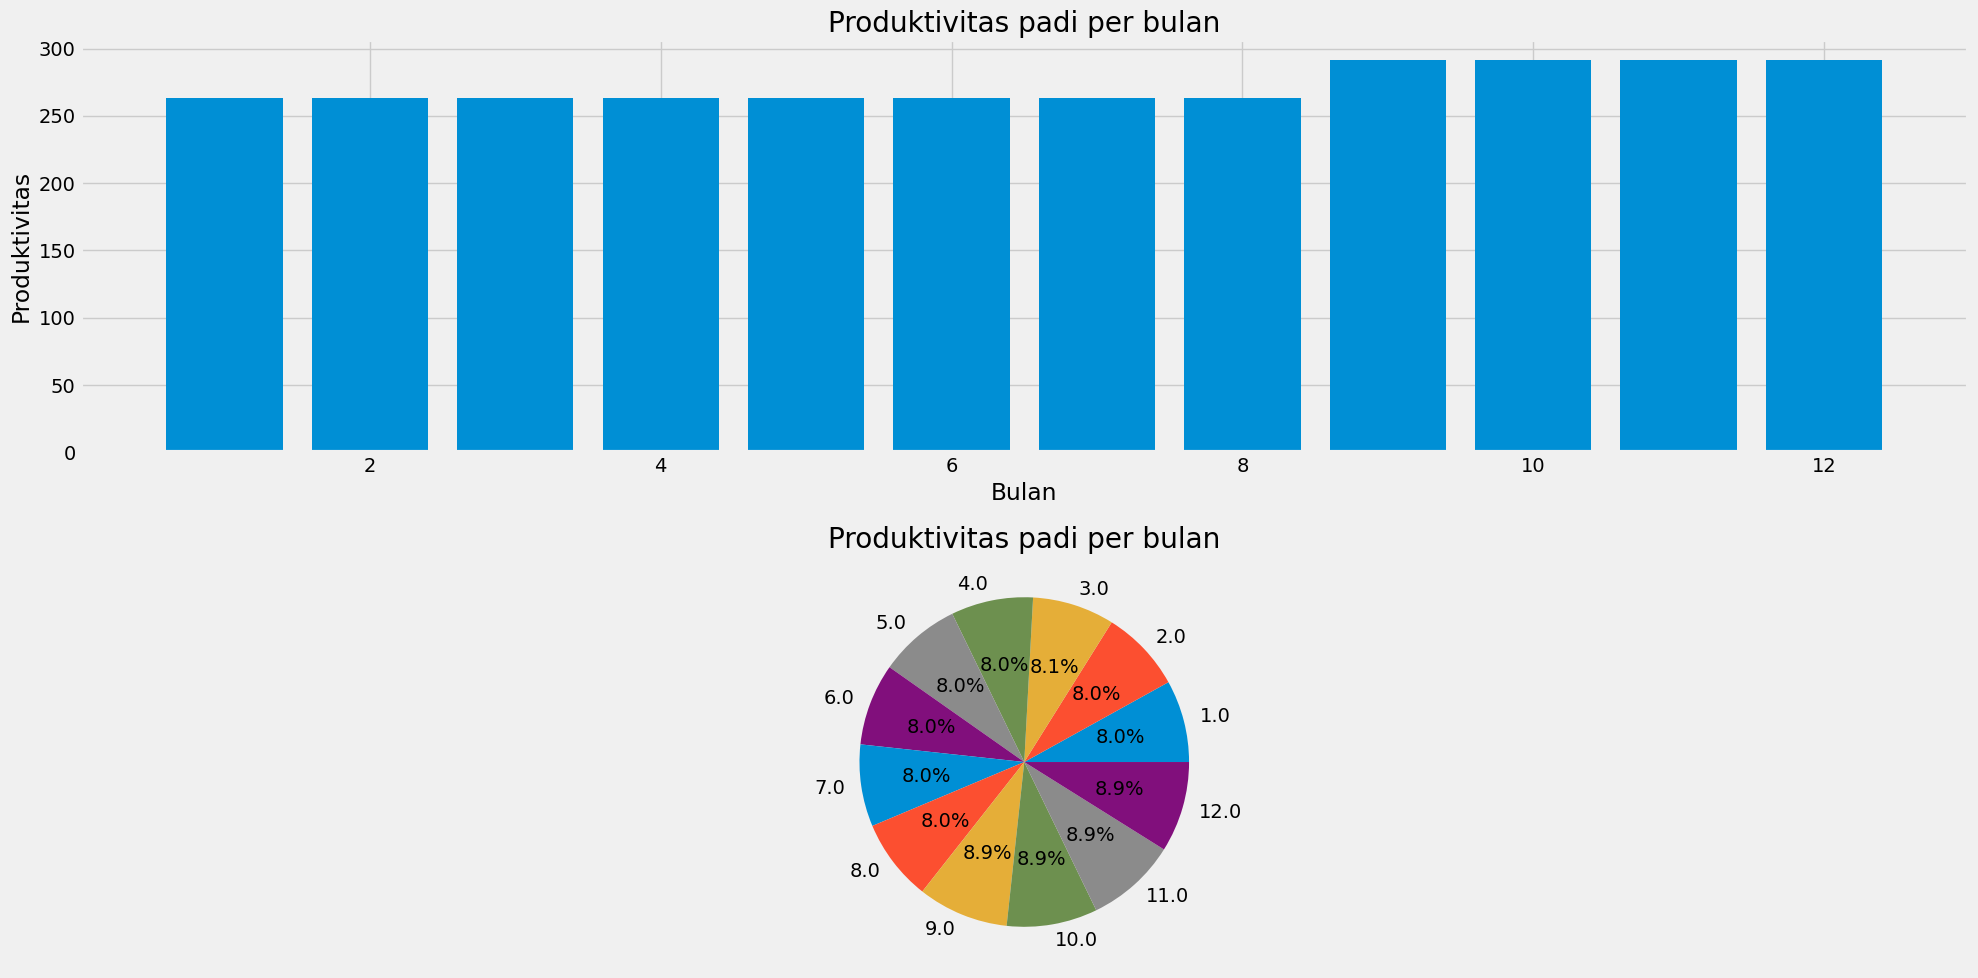

In [64]:
# Buat figure dan axes untuk subplots per bulan
fig, ax = plt.subplots(2,1,figsize=(20,10))

# Diagram batang untuk melihat produktivitas padi
ax[0].bar(grouped.index, grouped.values)
ax[0].set_title('Produktivitas padi per bulan')
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Produktivitas')

# Diagram pie untuk melihat produktivitas padi
ax[1].pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')
ax[1].set_title('Produktivitas padi per bulan')

plt.tight_layout()
plt.show()

# Bagaimana produktivitas padi pertahun?

In [73]:
# Kelompokkan data berdasarkan tahun dan hitung total produktivitas per tahun
grouped = df.groupby('YEAR')['produktivitas_padi'].sum()

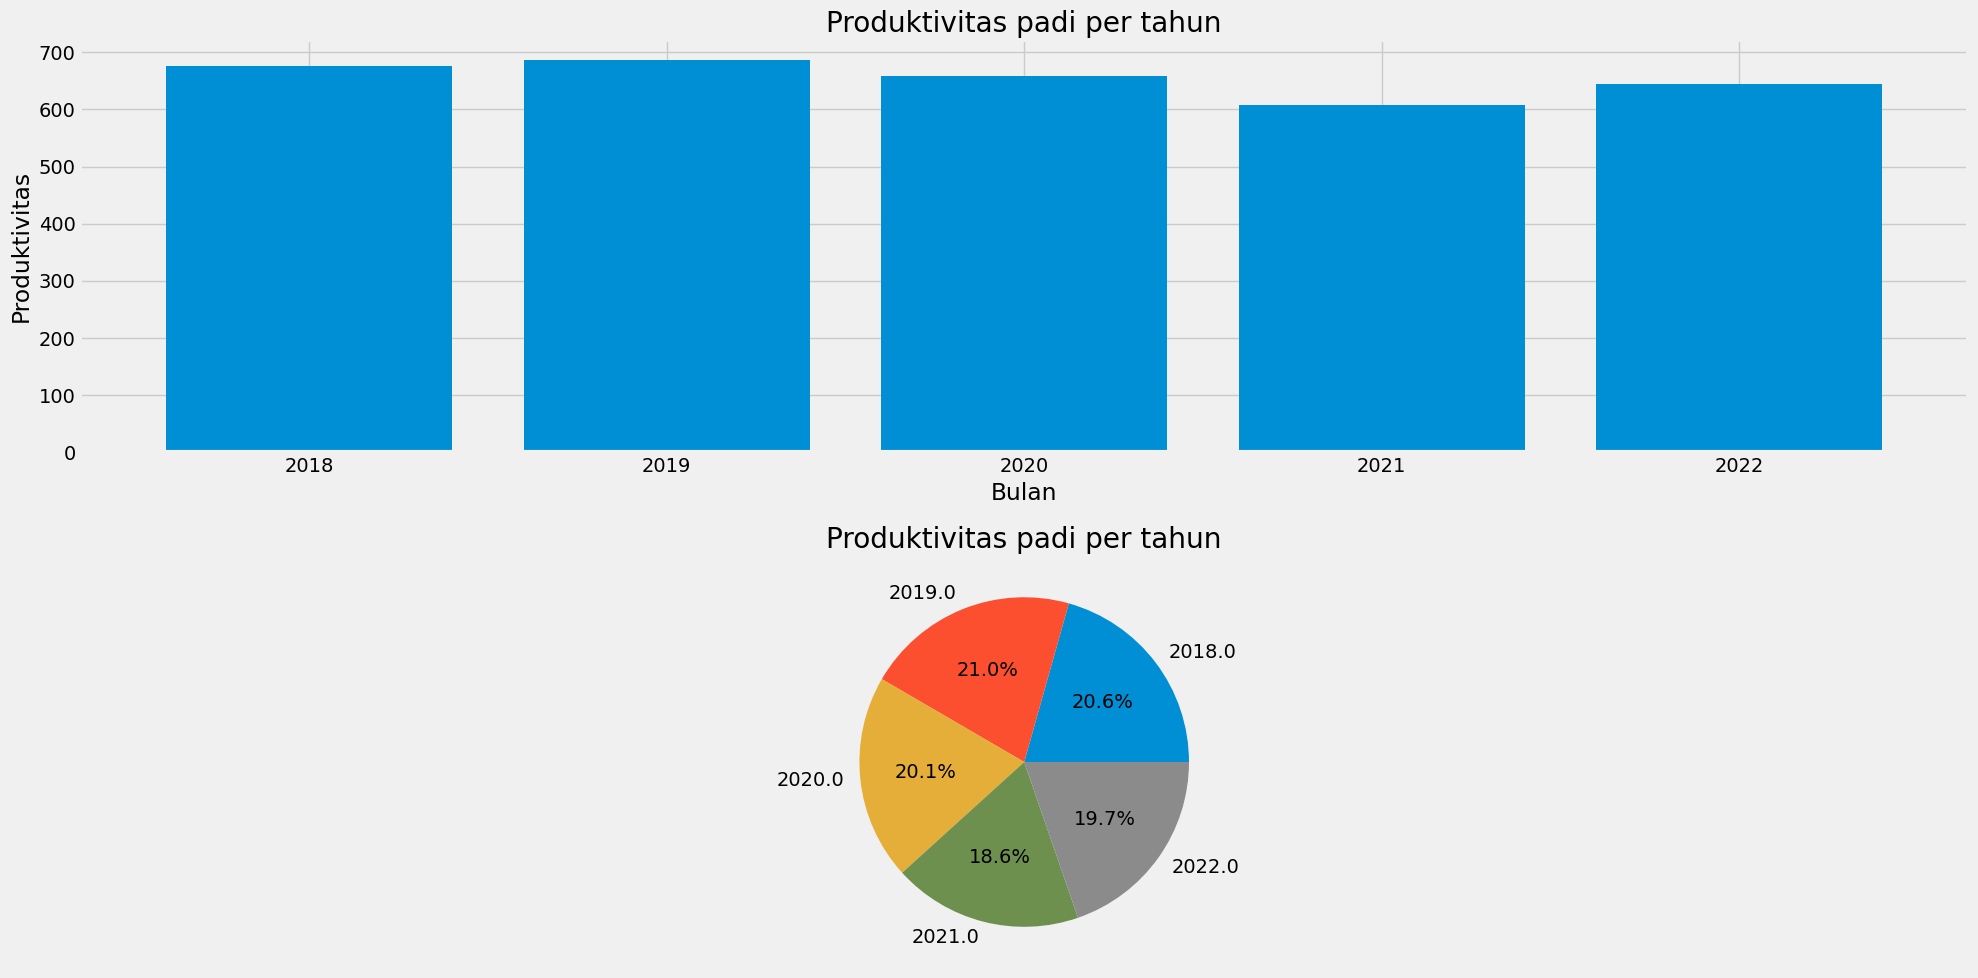

In [74]:
# Buat figure dan axes untuk subplots
fig, ax = plt.subplots(2,1,figsize=(20,10))

# Diagram batang untuk melihat produktivitas padi
ax[0].bar(grouped.index, grouped.values)
ax[0].set_title('Produktivitas padi per tahun')
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Produktivitas')

# Diagram pie untuk melihat produktivitas padi
ax[1].pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')
ax[1].set_title('Produktivitas padi per tahun')

plt.tight_layout()
plt.show()

# 1. Correlation between the features.


In [77]:
# Top 20 correlated features to the target
top20_corrs = abs(df.corr()['produktivitas_padi']).sort_values(ascending = False) #.head
top20_corrs

produktivitas_padi     1.000000
DOY                    0.464206
bulan                  0.463063
T2M_MAX                0.444501
TS                     0.437365
GWETPROF               0.432620
GWETROOT               0.427447
GWETTOP                0.409999
RH2M                   0.391398
ALLSKY_SFC_UVA         0.371403
T2M                    0.361869
YEAR                   0.352197
ALLSKY_SFC_PAR_TOT     0.345957
ALLSKY_SFC_SW_DWN      0.327193
ALLSKY_SFC_UVB         0.325885
T2M_RANGE              0.293982
TOA_SW_DWN             0.272930
luas_panen             0.243586
ALLSKY_SFC_UV_INDEX    0.241903
CLRSKY_SFC_SW_DWN      0.240365
CLRSKY_SFC_PAR_TOT     0.203255
QV2M                   0.194411
T2MDEW                 0.191644
PRECTOTCORR            0.190803
WD2M                   0.110426
produksi_padi          0.110419
WD10M                  0.108180
WS2M_RANGE             0.060051
WS2M                   0.059537
WS2M_MAX               0.052459
WS10M_RANGE            0.038482
ALLSKY_S

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D

# Korelasi setiap fitur
correlations = df.corr()
print(correlations)

In [80]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
# data.corr() ---> correlation matrix
fig = plt.gcf()
fig.set_size_inches(100,90)
plt.show()

# 2. Visualisasi

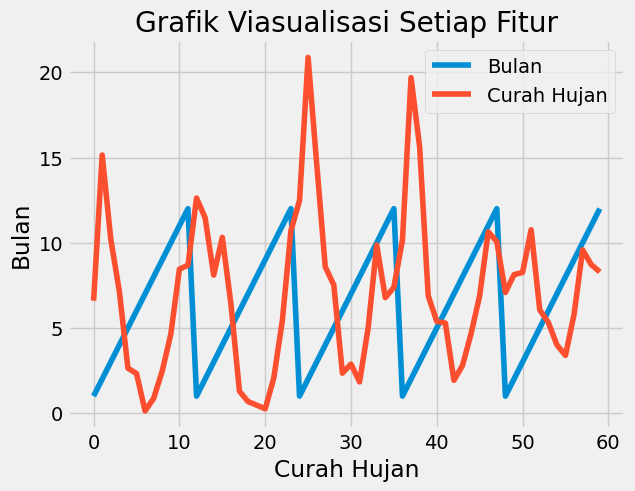

In [81]:
import matplotlib.pyplot as plt

# Grafik Bulan dan Produktivitas
plt.plot(df['bulan'], label='Bulan')
plt.plot(df['PRECTOTCORR'], label='Curah Hujan')

plt.xlabel('Curah Hujan')
plt.ylabel('Bulan')
plt.title('Grafik Viasualisasi Setiap Fitur')
plt.legend()

plt.show()

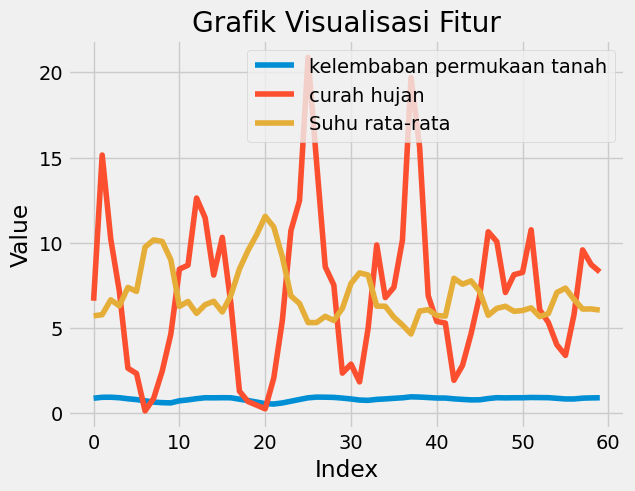

In [82]:
# plt.plot(dataset['produktivitas_padi (kuintal/hektar)'], label='produktivitas')
plt.plot(df['GWETTOP'], label='kelembaban permukaan tanah')
plt.plot(df['PRECTOTCORR'], label='curah hujan')
plt.plot(df['T2M_RANGE'], label='Suhu rata-rata')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Grafik Visualisasi Fitur')
plt.legend()

plt.show()

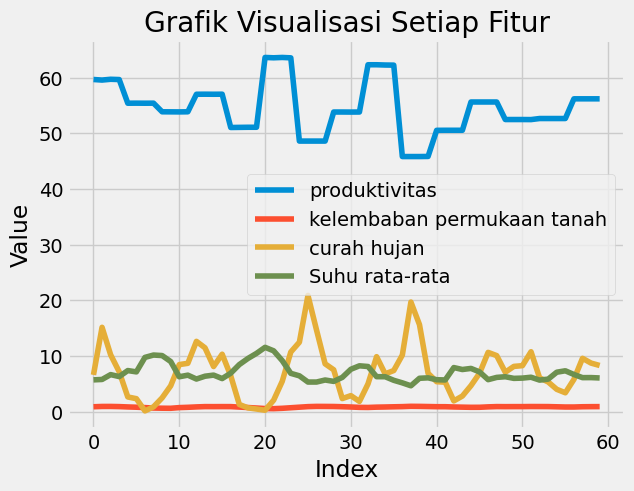

In [84]:
plt.plot(df['produktivitas_padi'], label='produktivitas')
plt.plot(df['GWETTOP'], label='kelembaban permukaan tanah')
plt.plot(df['PRECTOTCORR'], label='curah hujan')
plt.plot(df['T2M_RANGE'], label='Suhu rata-rata')
# plt.plot(data['bulan'], label='Bulan')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Grafik Visualisasi Setiap Fitur')
plt.legend()

plt.show()

# 3. Deskripsi Statistik

In [85]:
df.describe()

,YEAR,DOY,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,...,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN,bulan,luas_panen,produksi_padi,produktivitas_padi
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2020.000000,182.383333,17.292603,85.450475,7.080062,96.821460,1.403923,2.577208,0.547998,2.028898,...,23.483809,25.191124,6.946003,28.769463,21.823361,413.190732,6.500000,4762.133333,25676.133333,54.570333
std,1.426148,106.051329,0.916079,4.136991,4.580880,0.073904,0.307612,0.514092,0.181303,0.391316,...,0.585767,0.767101,1.562944,1.087861,0.931854,4.406712,3.481184,2758.620476,14130.828945,4.706627
min,2018.000000,16.000000,14.783000,71.719677,0.131613,96.648710,1.028387,1.920667,0.291667,1.428000,...,21.798065,24.052581,4.645357,26.782500,19.035161,399.200968,1.000000,1199.000000,5828.000000,45.820000
25%,2019.000000,98.125000,17.075323,83.976024,3.260968,96.774148,1.194177,2.244677,0.433167,1.771167,...,23.257895,24.733065,5.917702,28.111613,21.688952,411.479726,3.750000,2908.500000,14749.750000,51.080000
50%,2020.000000,182.250000,17.513306,86.985098,6.894414,96.824839,1.297930,2.421774,0.519761,1.945000,...,23.549806,25.068710,6.289962,28.610484,21.951613,413.708243,6.500000,4299.000000,23017.000000,53.855000
75%,2021.000000,266.875000,17.818167,88.162013,9.918710,96.867422,1.565781,2.753718,0.639839,2.128500,...,23.893083,25.510992,7.577661,29.092185,22.416747,416.082191,9.250000,5717.750000,31335.000000,57.010000
max,2022.000000,351.000000,18.746774,91.755714,20.873448,97.005667,2.451935,4.242258,1.195484,3.111935,...,24.444667,27.976774,11.550667,32.845161,23.073333,419.892667,12.000000,14866.000000,72249.000000,63.620000


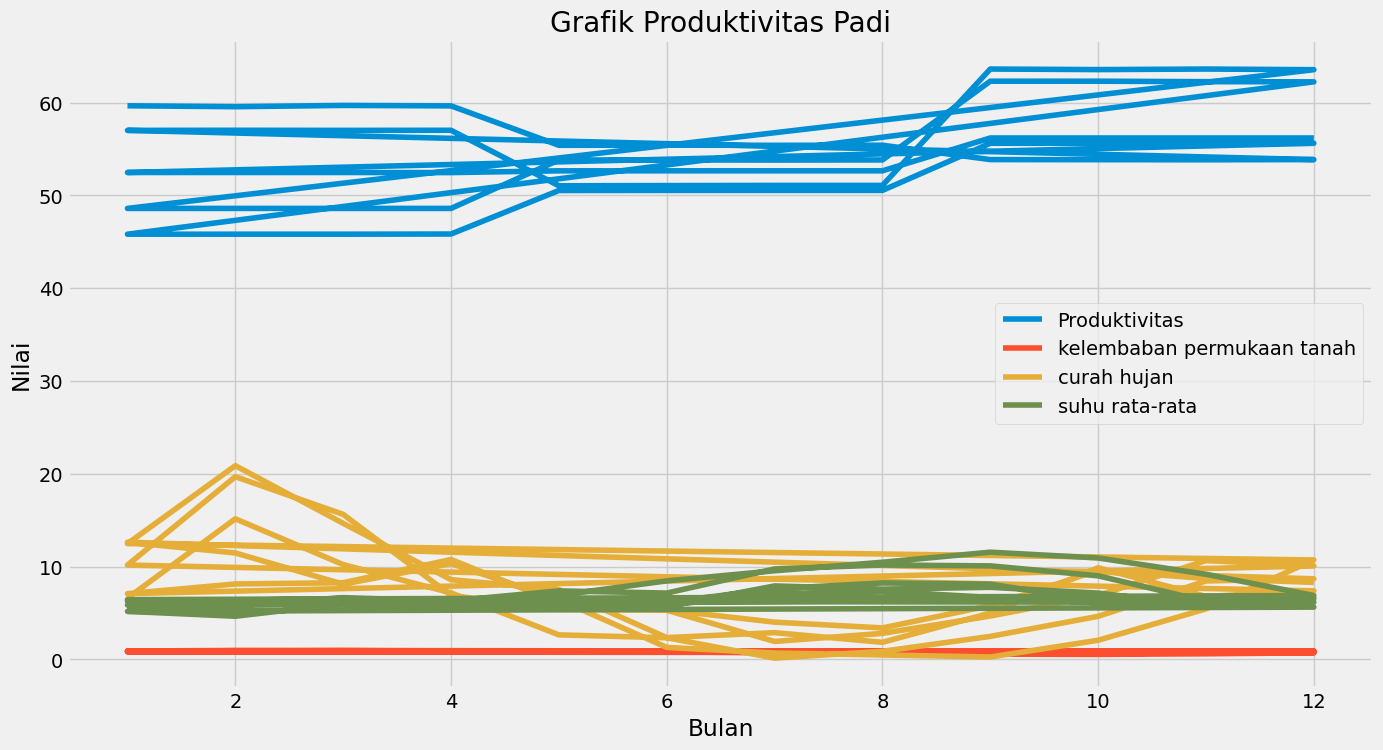

In [94]:
import matplotlib.pyplot as plt

# Plotting data
plt.figure(figsize=(15, 8))

plt.plot(df['bulan'], df['produktivitas_padi'], label='Produktivitas')
plt.plot(df['bulan'], df['GWETTOP'], label='kelembaban permukaan tanah')
plt.plot(df['bulan'], df['PRECTOTCORR'], label='curah hujan')
plt.plot(df['bulan'], df['T2M_RANGE'], label='suhu rata-rata')

plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Produktivitas Padi')
plt.legend()

plt.show()

# 4. Trend Analysis

# III. MODELLING

# 1. Pembagian Data
Bagi dataset Anda menjadi data pelatihan, validasi, dan pengujian. Pastikan untuk mempertimbangkan urutan waktu ketika membagi data. Anda mungkin ingin menggunakan data dari tahun-tahun sebelumnya untuk melatih model dan data dari tahun-tahun terbaru untuk validasi dan pengujian.

In [87]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D

# bagi data menjadi fitur (X) dan target (y)
X = df.drop('produktivitas_padi', axis=1)
y = df['produktivitas_padi']

In [88]:
# bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Pemodelan dengan LSTM-CNN
Setelah melakukan pra-pemrosesan, Anda dapat menggunakan model LSTM-CNN untuk memprediksi produktivitas padi. Pastikan untuk menyesuaikan arsitektur model dan parameter lainnya sesuai dengan data Anda.

In [89]:
# ubah data menjadi format yang sesuai untuk LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [90]:
# buat model LSTM-CNN
model = Sequential()

# Menambahkan layer LSTM
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))

In [91]:
# Menambahkan layer Convolutional
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

# Menambahkan layer Fully Connected
model.add(Dense(50, activation='relu'))

# Menambahkan layer Output
model.add(Dense(1))

In [92]:
# kompilasi model
model.compile(optimizer='adam', loss='mse')

# latih model
model.fit(X_train, y_train, epochs=50, verbose=0)

# evaluasi model
loss = model.evaluate(X_test, y_test)
print('Loss:', loss)

1/1 [==============================] - 1s 859ms/step - loss: 299.2903
Loss: 299.290283203125
